In [2]:
#Step 1
#Import necessary library
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
#Step 2
#Read Dataset
df = pd.read_csv('Symptom-severity.csv')
print(df)

                  Symptom  weight
0                 itching       1
1               skin_rash       3
2    nodal_skin_eruptions       4
3     continuous_sneezing       4
4               shivering       5
..                    ...     ...
128    inflammatory_nails       2
129               blister       4
130  red_sore_around_nose       2
131     yellow_crust_ooze       3
132             prognosis       5

[133 rows x 2 columns]


In [6]:
#Head
df.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [7]:
#Tail
df.tail()

,Symptom,weight
128,inflammatory_nails,2
129,blister,4
130,red_sore_around_nose,2
131,yellow_crust_ooze,3
132,prognosis,5


In [8]:
#Step 3
#Sanity check of data
df.shape

(133, 2)

In [9]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [10]:
#Finding Missing value
df.isnull().sum()

,0
Symptom,0
weight,0


In [11]:
#Finding duplicate
df.duplicated().sum()

0

In [12]:
#Identifying garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("********"*10)

Symptom
fluid_overload          2
itching                 1
spinning_movements      1
muscle_pain             1
irritability            1
                       ..
constipation            1
back_pain               1
pain_behind_the_eyes    1
loss_of_appetite        1
prognosis               1
Name: count, Length: 132, dtype: int64
********************************************************************************


In [13]:
#Step 4
#EDA
#descriptive statistical
df.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,133.0,4.225564,1.323543,1.0,3.0,4.0,5.0,7.0


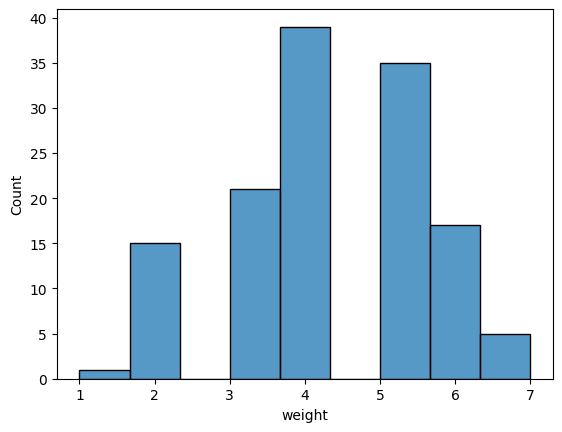

In [14]:
#histogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
    sn.histplot(data=df,x=i)
    plt.show()

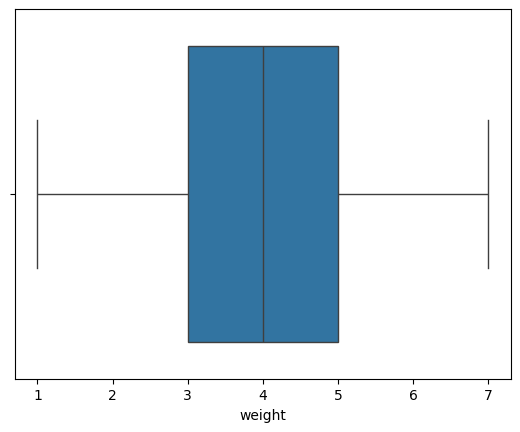

In [16]:
#boxplot to identify the outlier
for i in df.select_dtypes(include="number").columns:
    sn.boxplot(data=df,x=i)
    plt.show()

In [17]:
df.select_dtypes(include="number").columns

Index(['weight'], dtype='object')

In [18]:
print(df.columns)


Index(['Symptom', 'weight'], dtype='object')


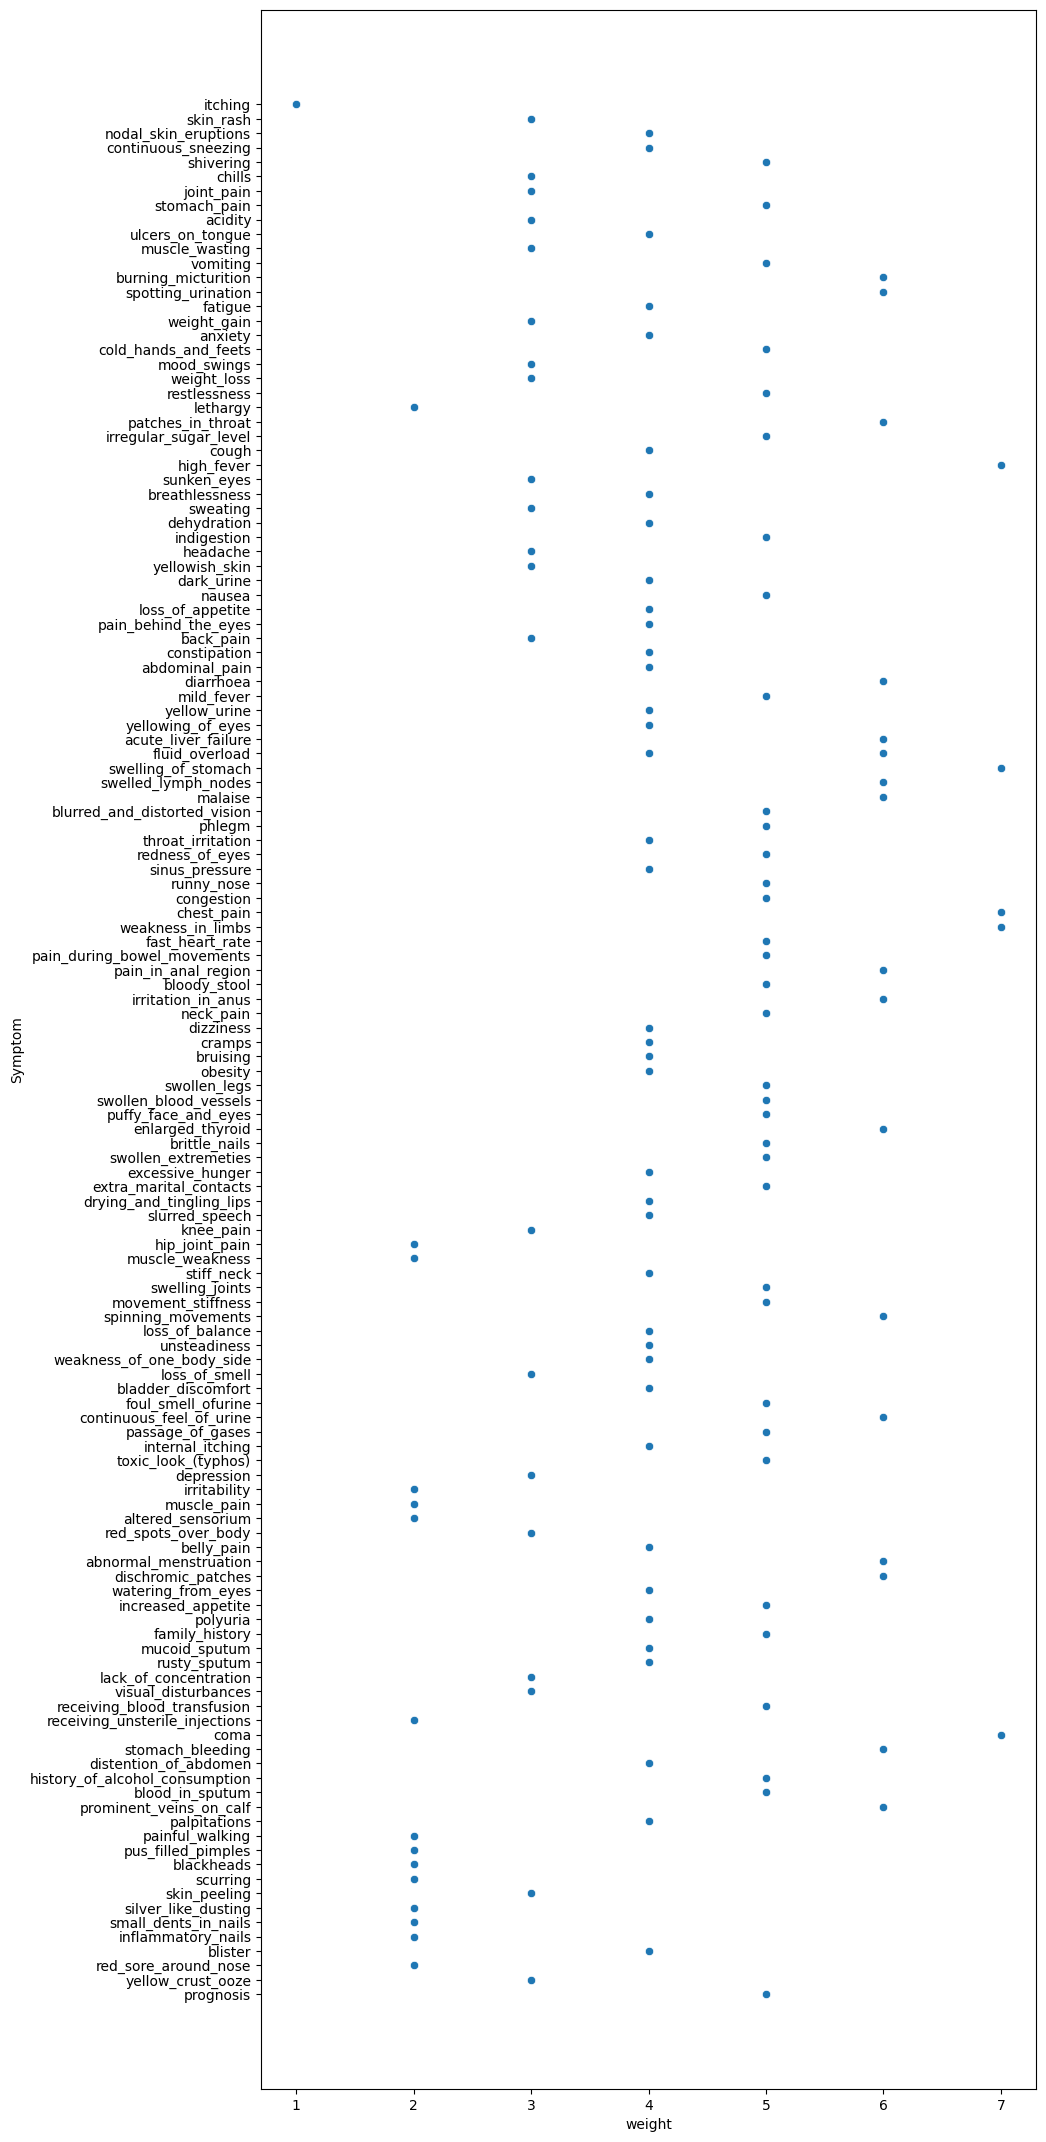

In [19]:
#scatter plot to understand the relationship
plt.figure(figsize=(10,27))
for i in ['weight']:
  sn.scatterplot(data=df, x=i, y='Symptom')
  plt.show()


<Axes: >

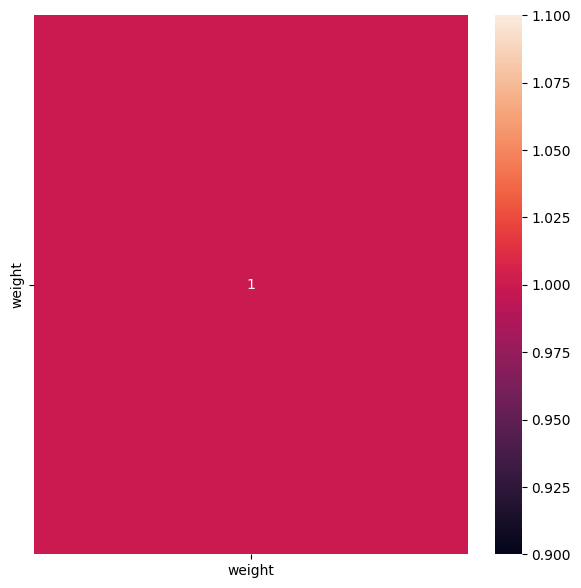

In [20]:
#correlation with heatmap to iinterpret the relation and multicolor
s = df.select_dtypes(include="number").corr()
plt.figure(figsize=(7,7))
sn.heatmap(s,annot=True)

In [21]:
for i in []:
  df[i].fillna(df[i].median(),inplace=True)

In [22]:
from sklearn.impute import KNNImputer

impute = KNNImputer()
for i in df.select_dtypes(include="number").columns:
    df[i] = impute.fit_transform(df[[i]])


In [23]:
df.isnull().sum()

,0
Symptom,0
weight,0


In [24]:
#decide whether to do outlier trarment or not, if do how?
def whisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound, upper_bound

lower, upper = whisker(df['weight'])


In [25]:
#decide whether to do outlier trarment or not, if do how?
def whisker(col):
    # Convert the column to numeric if it's not already.
    # Errors='coerce' will replace non-numeric values with NaN.
    col = pd.to_numeric(col, errors='coerce')
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound, upper_bound

In [26]:
whisker(df['weight'])

(0.0, 8.0)

In [27]:
whisker(df['Symptom'])

(nan, nan)

In [28]:
for i in ['weight','Symptom']:
  lower_bound, upper_bound = whisker(df[i])
  df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])
  df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])

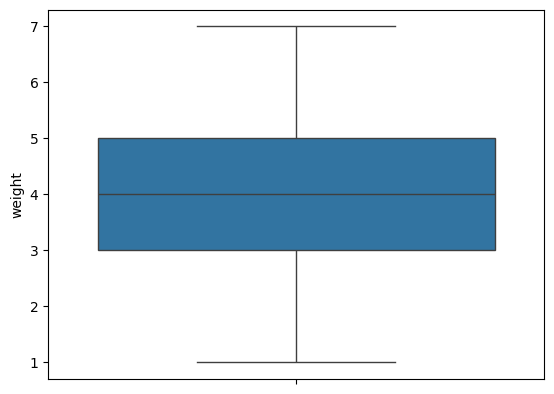

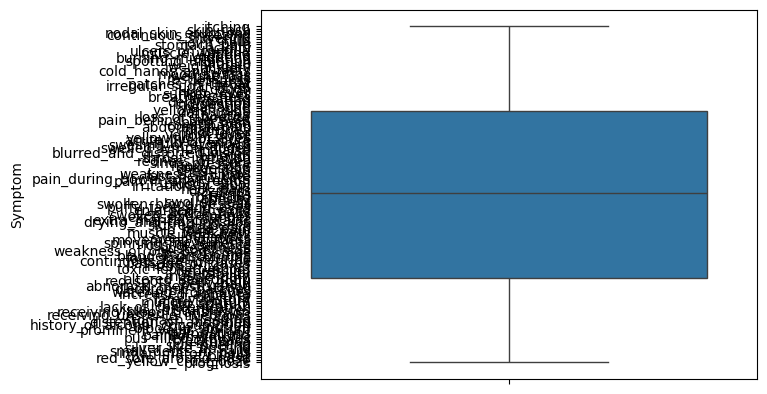

In [29]:
for i in ['weight','Symptom']:
  sn.boxplot(df[i])
  plt.show()

In [30]:
#step 7
#duplicate & gargabe value treatment
#check for duplicate if we have any unique column in the data set,delete
df.drop_duplicates()

,Symptom,weight
0,itching,1.0
1,skin_rash,3.0
2,nodal_skin_eruptions,4.0
3,continuous_sneezing,4.0
4,shivering,5.0
...,...,...
128,inflammatory_nails,2.0
129,blister,4.0
130,red_sore_around_nose,2.0
131,yellow_crust_ooze,3.0


In [31]:
#Encoding of data
dummy = pd.get_dummies(data=df,columns=['Symptom'],drop_first=True)

In [32]:
dummy = dummy.astype(int)
dummy

,weight,Symptom_abnormal_menstruation,Symptom_acidity,Symptom_acute_liver_failure,Symptom_altered_sensorium,Symptom_anxiety,Symptom_back_pain,Symptom_belly_pain,Symptom_blackheads,Symptom_bladder_discomfort,...,Symptom_vomiting,Symptom_watering_from_eyes,Symptom_weakness_in_limbs,Symptom_weakness_of_one_body_side,Symptom_weight_gain,Symptom_weight_loss,Symptom_yellow_crust_ooze,Symptom_yellow_urine,Symptom_yellowing_of_eyes,Symptom_yellowish_skin
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
import os
file_path = '/content/encoded_data.csv'
dummy.to_csv(file_path, index=False)
print("Current working directory:", os.getcwd())
print("Encoded data saved to:", file_path)

Current working directory: /content
Encoded data saved to: /content/encoded_data.csv


In [37]:
from google.colab import files
files.download('encoded_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>